<a href="https://colab.research.google.com/github/MatDawit/Startup-Success-Predictor.github.io/blob/jackie-ver/second3featurestartuppredictormodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Random Forest Classification Model**

`Goal`: successfully predict closed (0) or still operating (1) status

In [1]:
import pandas as pd

# importing the dataset
from google.colab import files
uploaded = files.upload()

dataset = pd.read_csv('df.csv')

Saving df.csv to df.csv


In [2]:
# importing more libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [3]:
# frequency coding category_list
def frequency_encode(dataset, column_name):
    freq = dataset[column_name].value_counts()
    dataset[column_name + '_freq'] = dataset[column_name].map(freq)
    return dataset

# apply to category list
dataset = frequency_encode(dataset, 'category_list')

By frequency encoding category_list, that changes categorical data to a numeric representation of how often the category appears in the dataset.

Numeric data is easier for machine learning models to work with.

In [4]:
# selecting features (x) and the target (y)
input = ['category_list_freq', 'country_code', 'funding_rounds']
x = dataset[input].copy()
y = dataset['status']

# converting country_code to a numerical format using one hot encoding
x = pd.get_dummies(x, columns=['country_code'], prefix='country')

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

Converted country_code to one hot encoding (converting categories to new category columns, then assigning 0 or 1 to those columns) to allow for the model to be able to utilize those features to predict accurately.

Binary data is easier for machine learning models to work with.

Selecting only 3 of 10  possible features to improve user accessibility and simplify the model's display. These 3 features are also the most important, overall, this adjustment keeps the model accurate and usable.

In [6]:
# importing library to use SMOTE
from imblearn.over_sampling import SMOTE

In [7]:
# implemented SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Step 4: Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(random_state=42)

This time to improve accuracy, I implemeneted SMOTE also known as Synthetic Minority Over-sampling Technique to try and address the imbalanced dataset to improve the prediction accuracy.

Currently, the machine learning model is extremely biased towards the majority class or 1s (still operating startups). This is causing it to provide false positives or predict a startup is still operating when it is not.

What SMOTE does is increase the amount of minority class or 0s (closed startups) to balance the dataset, therefore, making it easier on the model to predict.

In [8]:
# using test data to predict
modelpredict = model.predict(X_test)

In [9]:
modelpredict

array([1, 1, 1, ..., 1, 1, 1])

Classification:

`Failed (0)`: closed

`Successful (1)`: ipo, acquired, operating

In [10]:
print("Accuracy:", accuracy_score(y_test, modelpredict))
print("Confusion Matrix:\n", confusion_matrix(y_test, modelpredict))
print("Classification Report:\n", classification_report(y_test, modelpredict))

Accuracy: 0.6830685203574975
Confusion Matrix:
 [[  606   758]
 [ 5625 13151]]
Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.44      0.16      1364
           1       0.95      0.70      0.80     18776

    accuracy                           0.68     20140
   macro avg       0.52      0.57      0.48     20140
weighted avg       0.89      0.68      0.76     20140



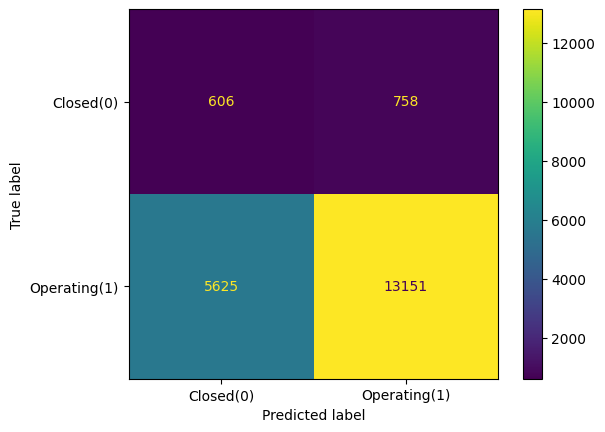

In [11]:
# visualizing accuracy
cm_visualization = ConfusionMatrixDisplay(confusion_matrix(y_test, modelpredict), display_labels=['Closed(0)', 'Operating(1)'])
cm_visualization.plot()

In [12]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_sm))

Before SMOTE: Counter({1: 75100, 0: 5457})
After SMOTE: Counter({1: 75100, 0: 75100})


SMOTE took effect. However, did not improve accuracy or recall for closed startups. In fact, reduced both statistics.